In [2]:
import random
import matplotlib.pyplot as plt
from typing import List
import numpy as np

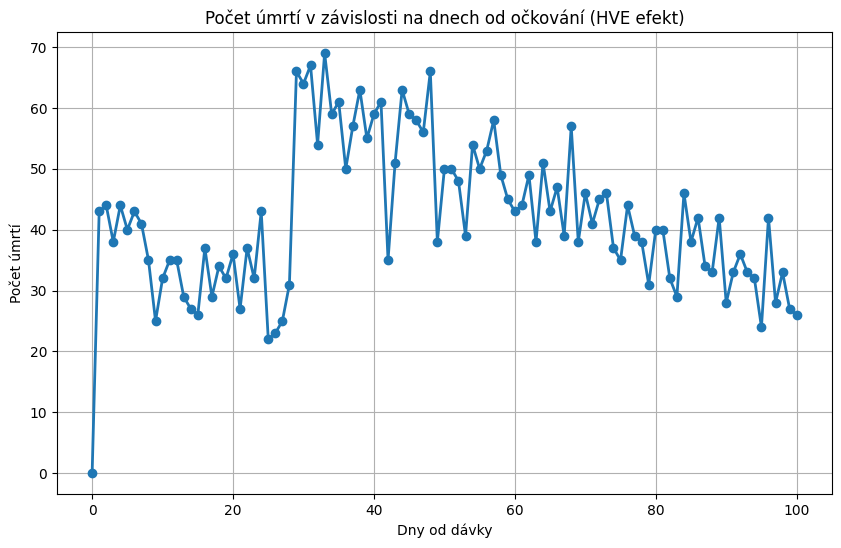

In [3]:
class Individual:
    def __init__(self, death_day: int):
        self.death_day = death_day
        self.doses = []  # Dny, kdy dostal dávky

    def is_alive(self, current_day: int) -> bool:
        return current_day < self.death_day

    def add_dose(self, day: int) -> bool:
        if self.is_alive(day) and len(self.doses) < 3:
            self.doses.append(day)
            return True
        return False


class HVESimulator:
    def __init__(
        self,
        number_of_individuals: int,
        num_of_days: int,
        hve_window_in_days: int,
        hve_probability: float,
    ):
        self.NUMBER_OF_INDIVIDUALS = number_of_individuals
        self.NUM_OF_DAYS = num_of_days
        self.HVE_WINDOW_IN_DAYS = hve_window_in_days
        self.HVE_PROBABILITY = hve_probability
        self.population: List[Individual] = self._create_population()

    def _create_population(self) -> List[Individual]:
        return [
            Individual(death_day=random.randint(0, self.NUM_OF_DAYS))
            for _ in range(self.NUMBER_OF_INDIVIDUALS)
        ]

    def _is_eligible_for_vaccine(
        self, individual: Individual, current_day: int
    ) -> bool:
        if individual.death_day - current_day <= self.HVE_WINDOW_IN_DAYS:
            return random.random() > self.HVE_PROBABILITY
        return True

    def run(self):
        for day in range(self.NUM_OF_DAYS):
            for individual in self.population:
                if individual.is_alive(day) and len(individual.doses) < 3:
                    if self._is_eligible_for_vaccine(individual, day):
                        if random.random() < 0.01:
                            individual.add_dose(day)

    def get_death_distribution_after_dose(
        self, dose_index: int = -1, max_days_after: int = 100
    ):
        distribution = [0] * (max_days_after + 1)
        for ind in self.population:
            if len(ind.doses) > 0:
                dose_day = ind.doses[dose_index]
                delta = ind.death_day - dose_day
                if 0 <= delta <= max_days_after:
                    distribution[delta] += 1
        return distribution


# --- Spuštění simulace a vykreslení grafu ---
sim = HVESimulator(
    number_of_individuals=10000,
    num_of_days=365,
    hve_window_in_days=28,
    hve_probability=0.5,
)
sim.run()
distribution = sim.get_death_distribution_after_dose(max_days_after=100)

plt.figure(figsize=(10, 6))
plt.plot(range(len(distribution)), distribution, marker="o", linewidth=2)
plt.title("Počet úmrtí v závislosti na dnech od očkování (HVE efekt)")
plt.xlabel("Dny od dávky")
plt.ylabel("Počet úmrtí")
plt.grid(True)
plt.show()

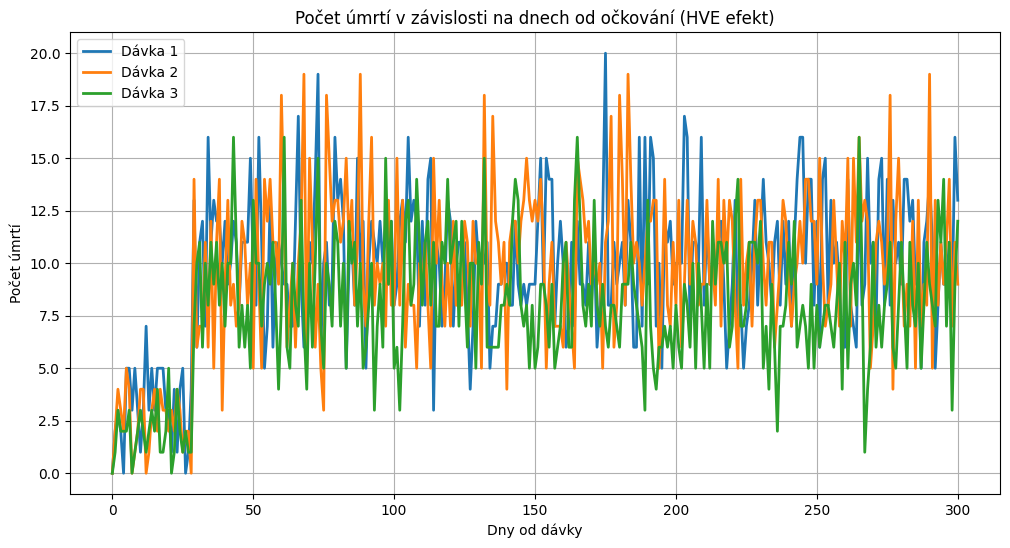

In [6]:
# === DOSEs HAVE 82%, 96%, 82% PROBABILITY OF BEING GIVEN ===


class Individual:
    def __init__(self, death_day: int):
        self.death_day = death_day
        self.doses = []  # Dny, kdy dostal dávky

    def is_alive(self, current_day: int) -> bool:
        return current_day < self.death_day

    def add_dose(self, day: int) -> bool:
        if self.is_alive(day) and len(self.doses) < 3:
            self.doses.append(day)
            return True
        return False


class HVESimulator:
    def __init__(
        self,
        number_of_individuals: int,
        num_of_days: int,
        hve_window_in_days: int,
        hve_probability: float,
    ):
        self.NUMBER_OF_INDIVIDUALS = number_of_individuals
        self.NUM_OF_DAYS = num_of_days
        self.HVE_WINDOW_IN_DAYS = hve_window_in_days
        self.HVE_PROBABILITY = hve_probability
        self.population: List[Individual] = self._create_population()

    def _create_population(self) -> List[Individual]:
        return [
            Individual(death_day=random.randint(0, self.NUM_OF_DAYS))
            for _ in range(self.NUMBER_OF_INDIVIDUALS)
        ]

    def _is_eligible_for_vaccine(
        self, individual: Individual, current_day: int
    ) -> bool:
        if individual.death_day - current_day <= self.HVE_WINDOW_IN_DAYS:
            return random.random() > self.HVE_PROBABILITY
        return True

    def assign_vaccines(self):
        # Dose 1 - 82% of population
        dose1_candidates = random.sample(
            self.population, int(0.82 * self.NUMBER_OF_INDIVIDUALS)
        )
        for person in dose1_candidates:
            week = max(0, int(np.random.normal(20, 3)))  # Week for dose 1
            day = week * 7
            if day < self.NUM_OF_DAYS and self._is_eligible_for_vaccine(person, day):
                person.add_dose(day)

        # Dose 2 - 96% of those who got dose 1
        dose2_candidates = [p for p in dose1_candidates if len(p.doses) > 0]
        dose2_candidates = random.sample(
            dose2_candidates, int(0.96 * len(dose2_candidates))
        )
        for person in dose2_candidates:
            lag_weeks = max(1, int(np.random.normal(20, 3)))
            day = person.doses[0] + lag_weeks * 7
            if day < self.NUM_OF_DAYS and self._is_eligible_for_vaccine(person, day):
                person.add_dose(day)

        # Dose 3 - 82% of those who got dose 2
        dose3_candidates = [p for p in dose2_candidates if len(p.doses) > 1]
        dose3_candidates = random.sample(
            dose3_candidates, int(0.82 * len(dose3_candidates))
        )
        for person in dose3_candidates:
            lag_weeks = max(1, int(np.random.normal(20, 3)))
            day = person.doses[1] + lag_weeks * 7
            if day < self.NUM_OF_DAYS and self._is_eligible_for_vaccine(person, day):
                person.add_dose(day)

    def get_death_distribution_after_dose(
        self, dose_index: int = 0, max_days_after: int = 100
    ):
        distribution = [0] * (max_days_after + 1)
        for ind in self.population:
            if len(ind.doses) > dose_index:
                dose_day = ind.doses[dose_index]
                delta = ind.death_day - dose_day
                if 0 <= delta <= max_days_after:
                    distribution[delta] += 1
        return distribution


# --- Spuštění simulace s novou logikou ---
sim = HVESimulator(
    number_of_individuals=10000,
    num_of_days=765,
    hve_window_in_days=28,
    hve_probability=0.7,
)
sim.assign_vaccines()

# Vykreslení grafů pro 1., 2. a 3. dávku
plt.figure(figsize=(12, 6))
for i, dose_label in enumerate(["Dávka 1", "Dávka 2", "Dávka 3"]):
    distribution = sim.get_death_distribution_after_dose(
        dose_index=i, max_days_after=300
    )
    if sum(distribution) > 0:
        plt.plot(range(len(distribution)), distribution, label=dose_label, linewidth=2)

plt.title("Počet úmrtí v závislosti na dnech od očkování (HVE efekt)")
plt.xlabel("Dny od dávky")
plt.ylabel("Počet úmrtí")
plt.legend()
plt.grid(True)
plt.show()

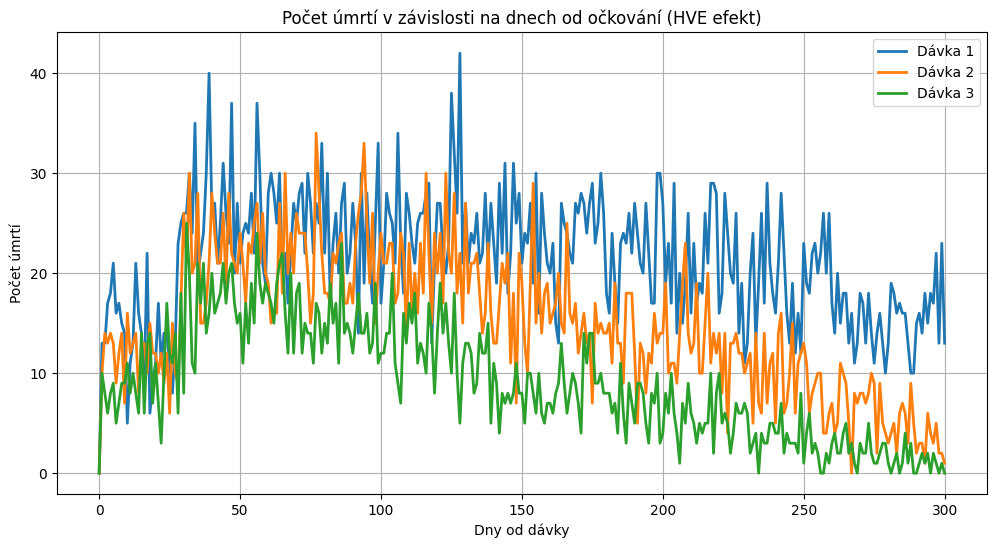

In [5]:
# === EACH DOSE HAS 0.1 PROBABILITY OF BEING GIVEN ===
class Individual:
    def __init__(self, death_day: int):
        self.death_day = death_day
        self.doses = []  # Dny, kdy dostal dávky

    def is_alive(self, current_day: int) -> bool:
        return current_day < self.death_day

    def add_dose(self, day: int) -> bool:
        if self.is_alive(day) and len(self.doses) < 3:
            self.doses.append(day)
            return True
        return False


class HVESimulator:
    def __init__(
        self,
        number_of_individuals: int,
        num_of_days: int,
        hve_window_in_days: int,
        hve_probability: float,
    ):
        self.NUMBER_OF_INDIVIDUALS = number_of_individuals
        self.NUM_OF_DAYS = num_of_days
        self.HVE_WINDOW_IN_DAYS = hve_window_in_days
        self.HVE_PROBABILITY = hve_probability
        self.population: List[Individual] = self._create_population()

    def _create_population(self) -> List[Individual]:
        return [
            Individual(death_day=random.randint(0, self.NUM_OF_DAYS))
            for _ in range(self.NUMBER_OF_INDIVIDUALS)
        ]

    def _is_eligible_for_vaccine(
        self, individual: Individual, current_day: int
    ) -> bool:
        if individual.death_day - current_day <= self.HVE_WINDOW_IN_DAYS:
            return random.random() > self.HVE_PROBABILITY
        return True

    def run(self):
        for day in range(self.NUM_OF_DAYS):
            for individual in self.population:
                if individual.is_alive(day) and len(individual.doses) < 3:
                    if self._is_eligible_for_vaccine(individual, day):
                        if random.random() < 0.01:  # 1% šance na dávku
                            individual.add_dose(day)

    def get_death_distribution_after_dose(
        self, dose_index: int = 0, max_days_after: int = 100
    ):
        distribution = [0] * (max_days_after + 1)
        for ind in self.population:
            if len(ind.doses) > dose_index:
                dose_day = ind.doses[dose_index]
                delta = ind.death_day - dose_day
                if 0 <= delta <= max_days_after:
                    distribution[delta] += 1
        return distribution


# --- Spuštění simulace ---
sim = HVESimulator(
    number_of_individuals=10000,
    num_of_days=365,
    hve_window_in_days=28,
    hve_probability=0.5,
)
sim.run()

plt.figure(figsize=(12, 6))
for i, dose_label in enumerate(["Dávka 1", "Dávka 2", "Dávka 3"]):
    distribution = sim.get_death_distribution_after_dose(
        dose_index=i, max_days_after=300
    )
    if sum(distribution) > 0:
        plt.plot(range(len(distribution)), distribution, label=dose_label, linewidth=2)

plt.title("Počet úmrtí v závislosti na dnech od očkování (HVE efekt)")
plt.xlabel("Dny od dávky")
plt.ylabel("Počet úmrtí")
plt.legend()
plt.grid(True)
plt.show()